In [1]:
# define the default font sizes to plot the pretty figures
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc("xtick", labelsize=10)
plt.rc('ytick', labelsize=10)

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

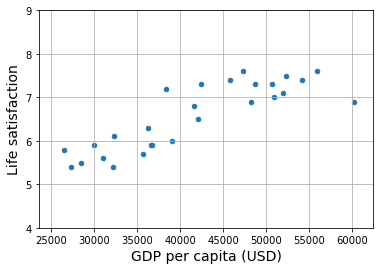

[[6.30165767]]


In [10]:
# Code example 1
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind="scatter", grid=True,
            x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]] # Cyprus GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.3016767]]

In [11]:
# Generating the data and figures
# This code generates the lifesat.csv dataset
# Create a function to save the changes
from pathlib import Path

# where to save the figures
IMAGES_PATH = Path()/ "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [13]:
# Load and prepare Life Satisfaction data

import urllib.request

datapath = Path()/ "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [17]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath/ "gdp_per_capita.csv")

In [16]:
# Preprocess the gdp per capita data to keep only the year 202

gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

KeyError: 'Year'